In [1]:
import os
import cobra
from os.path import join

In [2]:
modeliCW = cobra.io.read_sbml_model('iCW773.xml')

In [3]:
modelArray = modeliCW.to_array_based_model()
S = modelArray.S.todense()

In [4]:
# adding labels:
met_labels = set()
for i in modeliCW.metabolites:
    met_labels.add(i.id)
    #print(i)

# colors using attributes: 
# https://stackoverflow.com/questions/13517614/draw-different-color-for-nodes-in-networkx-based-on-their-node-value
#
# labels are a dictionnary in networkx: 
d = {e:0 for e in met_labels}

In [5]:
# https://stackoverflow.com/questions/29572623/plot-networkx-graph-from-adjacency-matrix-in-csv-file
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

def show_graph_with_labels(adjacency_matrix, graph_layout): #, mylabels
    
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    
    G = nx.Graph()
    G.add_edges_from(edges)
    
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)
        
    nx.draw(G, graph_pos, node_size=50)#, labels=graph_labels, with_labels=True)
    plt.show()


# interesting code: 
# rows, cols = np.where(S_adj == 1)
# edges = zip(rows.tolist(), cols.tolist())
# list(edges)
# zip help:
# https://docs.python.org/3/library/functions.html#zip

# better layout:
# 
# https://stackoverflow.com/questions/21978487/improving-python-networkx-graph-layout
# https://stackoverflow.com/questions/39411102/attributeerror-module-object-has-no-attribute-graphviz-layout-with-networkx
#

C:\Users\Personal\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126 MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\Personal\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138 MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\Personal\Anaconda3\lib\site-packages\matplotlib\__init__.py:917 UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
C:\Users\Personal\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152 UserWarning: axes.hold is deprecated, will be removed in 3.0


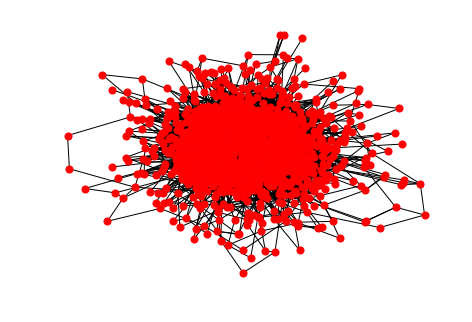

In [6]:
# S_adj is NOT an adjacency matrix. It is built from S. 
import numpy as np
import matplotlib.pylab as plt

S_adj = np.absolute(S)

show_graph_with_labels(S_adj, 'spring')

# possible solution??
# https://stackoverflow.com/questions/26914126/installed-pygraphviz-on-windows-7-but-unable-to-import-it-cant-find-graphviz

## Some notes on directed graphs: 

- https://www.cs.princeton.edu/courses/archive/fall06/cos226/lectures/digraph.pdf

# A problem: 

The topology module of cobrapy contains some interesting functions: 

https://opencobra.github.io/cobratoolbox/latest/modules/topology.html

most are NOT implemented in the python version: 

http://cobrapy.readthedocs.io/en/stable/cobra.topology.html?highlight=topology#module-cobra.topology

There is a way to extract the stoichiometric matrix from a cobra model:

> modelArray = modeliCW.to_array_based_model()

> S = modelArray.S.todense()

- Q1- How can you translate S into an adjacency matrix A? Then, use networkx to draw the graph. 

Alternative question: 

- A1- The problem with the adjacency matrix is relating some labels to the matrix. Is there a better way to store the graph? See https://www.cs.princeton.edu/courses/archive/fall06/cos226/lectures/digraph.pdf
- A2- Given a different representation, how to draw the graph using d3.js? 

A more general question: 

- G1- How can you draw the graph in a way that makes it interpretable?  
    - use a force layout?
        - https://github.com/d3/d3-force
    - make the graph interactive? 
        - adjustable force: https://bl.ocks.org/mbostock/aba1a8d1a484f5c5f294eebd353842da
        - drag and drop nodes: https://bl.ocks.org/mbostock/22994cc97fefaeede0d861e6815a847e and https://bl.ocks.org/mbostock/2675ff61ea5e063ede2b5d63c08020c7
            - drag and zoom: https://bl.ocks.org/mbostock/35964711079355050ff1
    - graph with nodes colored by degree: https://plot.ly/python/network-graphs/
      